In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from __future__ import division

In [4]:
import requests

In [5]:
from StringIO import StringIO

In [14]:
url = 'http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'
source = requests.get(url).text
poll_data = StringIO(source)

In [15]:
# Set poll data as pandas DataFrame
poll_df = pd.read_csv(poll_data)

# Let's get a glimpse at the data
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 15 columns):
Pollster                  590 non-null object
Start Date                590 non-null object
End Date                  590 non-null object
Entry Date/Time (ET)      590 non-null object
Number of Observations    568 non-null float64
Population                590 non-null object
Mode                      590 non-null object
Obama                     590 non-null int64
Romney                    590 non-null int64
Other                     202 non-null float64
Undecided                 423 non-null float64
Pollster URL              590 non-null object
Source URL                588 non-null object
Partisan                  590 non-null object
Affiliation               590 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 69.2+ KB


In [16]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47,47,NaN,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48,48,NaN,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
2,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50,49,1.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47,47,NaN,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48,49,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


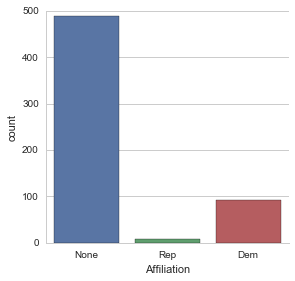

In [18]:
sns.factorplot('Affiliation', data = poll_df, kind = 'count')

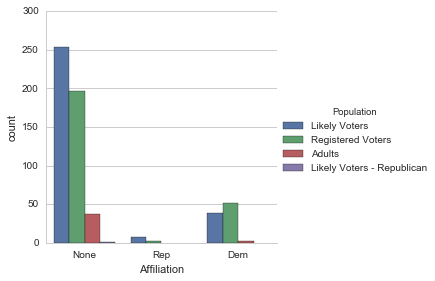

In [21]:
sns.factorplot('Affiliation',kind='count',data=poll_df, hue = 'Population')

In [23]:
avg = pd.DataFrame(poll_df.mean())

In [25]:
avg.drop('Number of Observations',axis=0,inplace = True)

In [26]:
std = pd.DataFrame(poll_df.std())

In [27]:
std.drop('Number of Observations',axis=0, inplace = True)

In [28]:
std.head()

,0
Obama,2.447069
Romney,2.925320
Other,2.721318
Undecided,3.698614


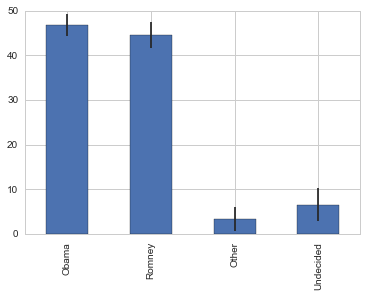

In [31]:
avg.plot(yerr=std,kind='bar',legend=False)

In [32]:
poll_avg = pd.concat([avg,std],axis=1)

In [34]:
poll_avg.columns = ['Average','STD']

In [35]:
poll_avg

,Average,STD
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Other,3.400990,2.721318
Undecided,6.546099,3.698614


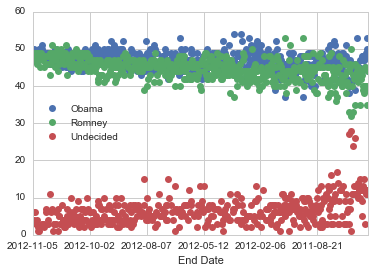

In [39]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')

In [40]:
from datetime import datetime

In [41]:
poll_df['Difference']= (poll_df.Obama - poll_df.Romney)/100

In [42]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47,47,NaN,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00
1,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48,48,NaN,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00
2,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50,49,1.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,0.01
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47,47,NaN,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,0.00
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48,49,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01


In [43]:
poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()

In [44]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Other,Undecided,Difference
0,2009-03-13,1403.0,44.0,44.0,NaN,12.0,0.00
1,2009-04-17,686.0,50.0,39.0,NaN,11.0,0.11
2,2009-05-14,1000.0,53.0,35.0,NaN,12.0,0.18
3,2009-06-12,638.0,48.0,40.0,NaN,12.0,0.08
4,2009-07-15,577.0,49.0,40.0,NaN,11.0,0.09


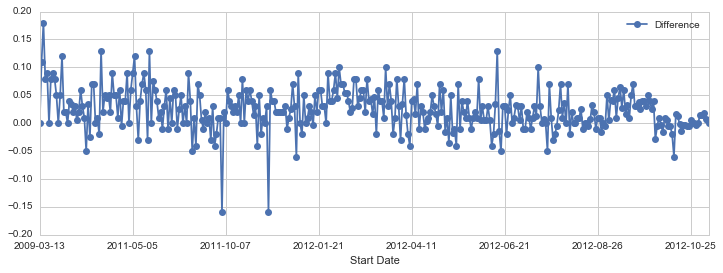

In [45]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-')

In [49]:
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
print min(xlimit)
print max(xlimit)

329
356


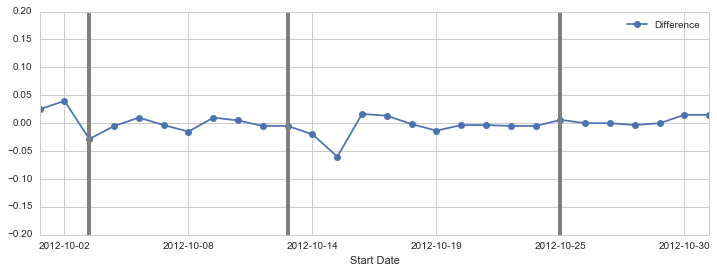

In [52]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',xlim=(329,356))


plt.axvline(x=329+2,linewidth=4,color='grey',)

plt.axvline(x=329+10,linewidth=4,color='grey',)

plt.axvline(x=329+21,linewidth=4,color='grey',)